<a href="https://colab.research.google.com/github/intelligentagents/aprendizagem-supervisionada/blob/master/notebooks/1_introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 1 - Aprendizagem Supervisonada
---



## Pré-Processamento dos Dados.

### Importando as bibliotecas

In [0]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold



### Importando e explorando o dataset

In [4]:
data_url = 'https://raw.githubusercontent.com/r4phael/ml-course/master/data/preprocessing_data.csv'

df = pd.read_csv(data_url)

df.head(10)

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,NaN,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,NaN,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Descrevendo o dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
City        10 non-null object
Age         9 non-null float64
Salary      9 non-null float64
Sex         10 non-null object
Acquired    10 non-null object
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


Exibindo o sumário dos valores númericos do dataset:

In [6]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,36.888889,5733.333333
std,8.992281,1110.180166
min,21.000000,4300.000000
25%,33.000000,4900.000000
50%,38.000000,5400.000000
75%,42.000000,6500.000000
max,51.000000,7500.000000


Analisando a Distribuição das váriaveis numéricas em um bloxplot:


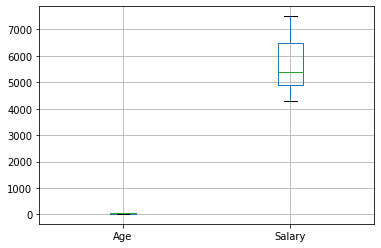

In [7]:
df.boxplot()

Analisando a Distribuição das váriaveis numéricas em um gráfico de barras:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f829a30f1d0>,
      dtype=object)

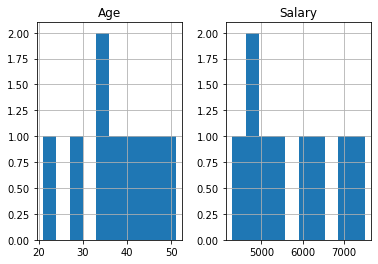

In [8]:
df.hist()

### Manipulação e tratamento dos dados.

Detectando registros com valores nulos no dataframe:

In [9]:
df[df.isnull().any(axis=1)]

,City,Age,Salary,Sex,Acquired
4,Maceio,38.0,NaN,M,Yes
6,Belo Horizonte,NaN,4700.0,F,No


Deletando registros com valores nulos:

In [10]:
df.dropna()

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
5,Sao Paulo,33.0,5200.0,M,Yes
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Preenchendo os registros nuḿericos que não possuem valores com zeros:

In [11]:
df.fillna(0)

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,0.0,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,0.0,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Preenchendo os registros nuḿericos que não possuem valores com a média.

In [12]:
df.fillna(df.mean())

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.000000,6500.000000,M,No
1,Sao Paulo,21.000000,4300.000000,F,Yes
2,Brasilia,28.000000,4900.000000,F,No
3,Recife,35.000000,5400.000000,F,No
4,Maceio,38.000000,5733.333333,M,Yes
5,Sao Paulo,33.000000,5200.000000,M,Yes
6,Belo Horizonte,36.888889,4700.000000,F,No
7,Sao Paulo,45.000000,7100.000000,M,Yes
8,Paraiba,51.000000,7500.000000,F,No
9,Fortaleza,39.000000,6000.000000,M,Yes


Salvando o dataframe com os registros nuḿericos que não possuem valores com a mediana.

In [13]:
df = df.fillna(df.median())
df

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,5400.0,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,38.0,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Definindos as variáveis independentes (X) e dependentes (y).

In [14]:
X = df.iloc[:, :-1].values
X

array([['Paraiba', 42.0, 6500.0, 'M'],
       ['Sao Paulo', 21.0, 4300.0, 'F'],
       ['Brasilia', 28.0, 4900.0, 'F'],
       ['Recife', 35.0, 5400.0, 'F'],
       ['Maceio', 38.0, 5400.0, 'M'],
       ['Sao Paulo', 33.0, 5200.0, 'M'],
       ['Belo Horizonte', 38.0, 4700.0, 'F'],
       ['Sao Paulo', 45.0, 7100.0, 'M'],
       ['Paraiba', 51.0, 7500.0, 'F'],
       ['Fortaleza', 39.0, 6000.0, 'M']], dtype=object)

In [15]:
y = df.iloc[:, 4].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

Codificando os valores da variável dependente (y) com valores númericos. 

In [16]:
le = LabelEncoder()

y = df.iloc[:, 4].values
y = le.fit_transform(y)

y


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Criando variáveis Dummy. 

*Obs*: Algumas técnicas de aprendizado de máquina exigem que você elimine uma dimensão da apresentação para evitar a dependência entre as variáveis. Isso pode ser feito através do parâmetro "drop_first = True".

In [17]:

pd.get_dummies(df.iloc[:, :-1] ,prefix=['city', 'sex'], drop_first=True)

,Age,Salary,city_Brasilia,city_Fortaleza,city_Maceio,city_Paraiba,city_Recife,city_Sao Paulo,sex_M
0,42.0,6500.0,0,0,0,1,0,0,1
1,21.0,4300.0,0,0,0,0,0,1,0
2,28.0,4900.0,1,0,0,0,0,0,0
3,35.0,5400.0,0,0,0,0,1,0,0
4,38.0,5400.0,0,0,1,0,0,0,1
5,33.0,5200.0,0,0,0,0,0,1,1
6,38.0,4700.0,0,0,0,0,0,0,0
7,45.0,7100.0,0,0,0,0,0,1,1
8,51.0,7500.0,0,0,0,1,0,0,0
9,39.0,6000.0,0,1,0,0,0,0,1


Criando a função de escalonamento:

In [0]:
# Função de escalonamento
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

Visualizando a primeira instância do array de features após a aplicação da transformação do escalonamento.

In [27]:
X = pd.get_dummies(df.iloc[:, :-1] ,prefix=['city', 'sex'], drop_first=True).values

X = feature_scaling(X)

X[:, 1]

array([ 0.80160482, -1.40280843, -0.80160482, -0.30060181, -0.30060181,
       -0.50100301, -1.00200602,  1.40280843,  1.80361084,  0.30060181])

### Visualização dos Dados

Visualizando os dados numéricos (idade e salário) através de um gráfico de dispersão. Os eixo x e y correspondem ao salário e a idade respectivamente. Já as cores dos pontos estão relacionadas a variável *Acquired*, que siginifica se o cliente realizou a compra.

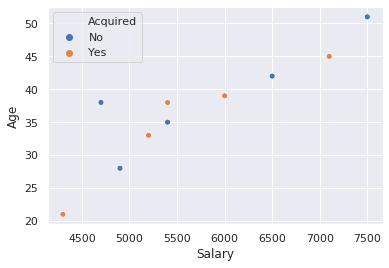

In [28]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="Salary", y="Age", hue="Acquired", data=df)


## Efetividade na Classificação

Criando as funções que calculam as diferentes métricas de efetividade:

### Cálculo das Medidas de Efetividade

Definindo as funções de efetividade e importando bibliotecas:

In [0]:
# Função que calcula os reais positivos
def rp(tp, fn):
    return tp + fn

# Função que calcula os reais negativos     
def rn(fp, tn):
    return fp + tn

# Função que calcula as predições positivas  
def pp(tp, fp):
    return tp + fp

# Função que calcula as predições negativas   
def pn(fn, tn):
    return fn + tn

# Função que calcula Acurácia do modelo
def accuracy (tp, fp, fn, tn):
     accuracy = ((tp + tn) / (tp + tn + fp + fn))
     return (accuracy)
    
# Função que calcula a Precisão 
def precision (tp, fp):
    precision =  (tp / (tp + fp)) #predições positivas
    return precision

# Função que calcula o Recall ou Taxa de True Positive (TTP)
def recall(tp, fn):
    recall =  (tp / (tp + fn)) # reais positivos
    return recall

## Função que calcula o f-measure (media harmonica entre Precision e Recall)
def f_measure(tp, fp, fn):
    f_measure = (2 * precision(tp, fp) * recall(tp, fn)) / (recall(tp, fn) + precision(tp, fp))
    return f_measure
  
# Função que calcula o Informedness 
def informedness(tp, fp, fn, tn):
    inform = ((tp/rp(tp, fn)) - (fp/rn(fp, tn)))
    return inform

# Função que calcula o Markedness
def markdness(tp, fp, fn, tn):    
    mark = ((tp/pp(tp,fp)) - (fn/pn(fn,tn)))
    return mark

# Função que calcula a taxa de False Positive (TFP)
def tfp(fp, tn):
  tfp = (fp / (tn + fp))
  return tfp

Definido os valores da Matriz de Confusão

In [0]:
tp, fp, fn, tn = [1,1,1,2]

Calculando a Acurácia:

In [31]:
accuracy (tp, fp, fn, tn)

0.6

Calculando a Precision:

In [32]:
precision (tp, fp)

0.5

Calculando o Recall:

In [33]:
 recall(tp, fn)

0.5

Calculando o Informedness: 

In [34]:
informedness(tp, fp, fn, tn)

0.16666666666666669

Calculando o Markedness:

In [35]:
markdness(tp, fp, fn, tn)

0.16666666666666669

## Treinamento e Testes de Modelos de Predição

### Divisão do Dataset

Dividindo o dataset no conjunto de treinamento e testes. Normalmente o conjunto de testes equivale a 1/3 do dataset total:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)

print("Tamanho do Dataset. {}".format(df.shape[0]))
print("Tamanho do Conjunto de Treinamento. {}".format(len(X_train)))
print("Tamanho do Conjunto de Testes. {}".format(len(X_test)))


Tamanho do Dataset. 10
Tamanho do Conjunto de Treinamento. 6
Tamanho do Conjunto de Testes. 4


### Validação Cruzada


Criando uma função para definir os índices de uma validação cruzada:

In [0]:
# Função que retorna os indices do validação cruzada em k folds
def k_fold_cv(indexes, k = 5, seed = 42):
    
    """Função que retorna os indices do validação cruzada em k folds

    Parâmetros
    ----------
    
    indexes : array
        Indices do dataframe
    
    k : int, optional, default=5
        Numero de folds. Deve ser pelo menos 2.
    
    seed : int, optional, default=42
        È o valor usado pelo gerador de números aleatórios;
     """ 
        
    size = len(indexes)
    subset_size = round(size / k)
    random.Random(seed).shuffle(indexes)
    subsets = [indexes[x:x+subset_size] for x in range(0, len(indexes), subset_size)]
    kfolds = []
    for i in range(k):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train,test))
        print ("Indices de Treinamento:", train, "Indices de Testes:", test)


Utilizando a função criada para definir os índices de treinamento e testes a serem utilizados usando 5 folds:

In [38]:
instances = list(df.index.values)
instances

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
k_fold_cv(instances)

Indices de Treinamento: [[2, 8], [5, 6], [9, 4], [0, 1]] Indices de Testes: [7, 3]
Indices de Treinamento: [[7, 3], [5, 6], [9, 4], [0, 1]] Indices de Testes: [2, 8]
Indices de Treinamento: [[7, 3], [2, 8], [9, 4], [0, 1]] Indices de Testes: [5, 6]
Indices de Treinamento: [[7, 3], [2, 8], [5, 6], [0, 1]] Indices de Testes: [9, 4]
Indices de Treinamento: [[7, 3], [2, 8], [5, 6], [9, 4]] Indices de Testes: [0, 1]
